In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
from wordcloud import WordCloud
from collections import Counter

In [3]:
df = pd.read_csv('data/data_20201014.csv')

In [12]:
df.describe()

,view_to_sub,channel_sub
count,4101.000000,4.101000e+03
mean,0.260628,1.376743e+06
std,0.807520,4.255809e+06
min,0.000000,2.190000e+03
25%,0.035457,5.790000e+04
50%,0.103644,2.810000e+05
75%,0.271138,7.780000e+05
max,31.769470,3.700000e+07


## Best Videos

In [11]:
df.sort_values('view_to_sub', ascending=False).head(10)

,title,thumbnail,view_to_sub,channel_sub,published_at,published_at_date
3029,LUCKIEST PEOPLE CAUGHT ON CAMERA!,https://i.ytimg.com/vi/Kn3uZ6-jSWI/hqdefault.jpg,31.769470,545000,2020-09-05T21:54:41Z,5/9/2020
3647,Every Time James Acaster Goes on Sunday Brunch...,https://i.ytimg.com/vi/GteuQRIowx8/hqdefault.jpg,16.487358,7040,2020-07-27T15:41:34Z,27/7/2020
3646,"Ricky Gervais, Karl Pilkington and Stephen Mer...",https://i.ytimg.com/vi/0EulHS7ze_M/hqdefault.jpg,13.640199,7040,2020-07-28T19:30:12Z,28/7/2020
1783,RWBY Volume 8 Teaser | Rooster Teeth Trailers,https://i.ytimg.com/vi/VTpynn8xdA8/hqdefault.jpg,11.784321,24300,2020-09-14T20:40:00Z,14/9/2020
973,Moving hoop won't let you miss,https://i.ytimg.com/vi/myO8fxhDRW0/hqdefault.jpg,10.815253,1090000,2020-09-09T10:43:04Z,9/9/2020
90,Why I’ll NEVER Wear These Scrubs,https://i.ytimg.com/vi/aqj7T-wes2c/hqdefault.jpg,9.989455,11000,2020-10-13T18:34:02Z,13/10/2020
2843,DDG - Moonwalking in Calabasas Remix (feat. Bl...,https://i.ytimg.com/vi/QZ2F3ZP1sxg/hqdefault.jpg,9.073820,1580000,2020-08-22T17:02:44Z,22/8/2020
93,Nurse Bianca Antisera on Discrimination Agains...,https://i.ytimg.com/vi/bSvztZ83KKQ/hqdefault.jpg,6.315727,11000,2020-10-04T07:57:57Z,4/10/2020
2570,Lisa Licentia ohne Maske,https://i.ytimg.com/vi/4sT-y1ciXGY/hqdefault.jpg,6.203739,9360,2020-07-31T14:24:46Z,31/7/2020
3071,"Confronting MeetKevin | How He Makes $1,000,00...",https://i.ytimg.com/vi/ZwH8FZ3XZZQ/hqdefault.jpg,5.731966,40700,2020-09-27T09:01:46Z,27/9/2020


## Most Common Word in Title

In [31]:
title_words = list(df['title'].apply(lambda x: x.split()))
title_words = [x for words in title_words for x in words]
Counter(title_words).most_common(30)

[('|', 1006),
 ('-', 813),
 ('The', 669),
 ('the', 378),
 ('&', 332),
 ('to', 321),
 ('How', 288),
 ('a', 285),
 ('and', 278),
 ('of', 266),
 ('in', 238),
 ('I', 228),
 ('A', 210),
 ('To', 169),
 ('with', 153),
 ('for', 149),
 ('You', 128),
 ('on', 122),
 ('My', 108),
 ('2020', 106),
 ('Your', 102),
 ('With', 97),
 ('Is', 93),
 ('For', 93),
 ('In', 90),
 ('Of', 86),
 ('2', 83),
 ('Why', 77),
 ('Day', 74),
 ('No', 74)]

In [42]:
wc = WordCloud(width=1000, height=1000,
               font_path = 'font/aBigDeal.otf',
              collocations=False, background_color='white',
              colormap='tab10').generate(" ".join(title_words))

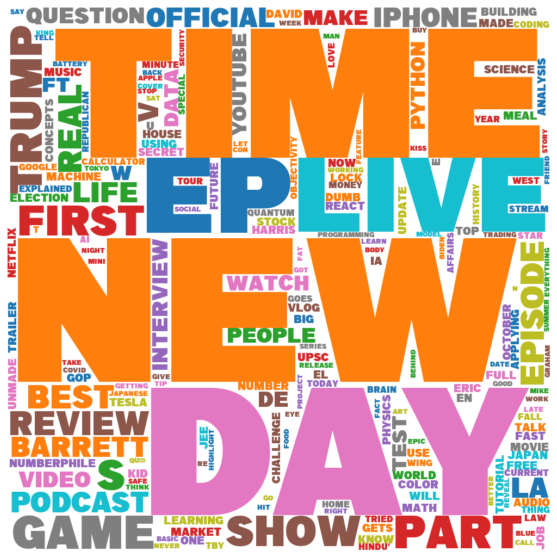

In [43]:
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")